In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial function f(x) = 5x^3 - 10x^2 - 5x + 9
def polynomial_function(x):
    return 5*x**3 - 10*x**2 - 5*x + 9

# Generate training data for integers in the range [-100, 100]
x_train = np.linspace(-100, 101, 30000, dtype=np.float32)
y_train = polynomial_function(x_train)

# Define an improved neural network
class PolynomialApproximator(nn.Module):
    def __init__(self):
        super(PolynomialApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 1)
        # self.bn1 = nn.BatchNorm1d(128)
        # self.bn2 = nn.BatchNorm1d(64)
        # self.dropout1 = nn.Dropout(0.2)
        # self.dropout2 = nn.Dropout(0.2)

    def forward(self, x):
        x = self.fc1(x)
        # x = self.bn1(x)
        x = self.relu1(x)
        # x = self.dropout1(x)
        x = self.fc2(x)
        # x = self.bn2(x)
        x = self.relu2(x)
        # x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate the improved model, MAE loss function, and optimizer
model = PolynomialApproximator()
criterion = nn.MSELoss()  # Mean Absolute Error (MAE) loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Use Adam optimizer for better convergence
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.5)  # Learning rate scheduler

# Training loop
num_epochs = 4000

for epoch in range(num_epochs):
    model.train()

    inputs = torch.from_numpy(x_train.reshape(-1, 1))
    targets = torch.from_numpy(y_train.reshape(-1, 1))

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    # scheduler.step()

    if (epoch + 1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            # Calculate MAE for printing accuracy
            mae = torch.mean(torch.abs(outputs - targets))

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, MAE: {mae.item():.4f}')

# Evaluate the trained model on a non-integer input


Epoch [100/4000], Loss: 1005128384512.0000, MAE: 679930.9375
Epoch [200/4000], Loss: 594453135360.0000, MAE: 664134.9375
Epoch [300/4000], Loss: 586597269504.0000, MAE: 658110.9375
Epoch [400/4000], Loss: 578376171520.0000, MAE: 652002.2500
Epoch [500/4000], Loss: 568467587072.0000, MAE: 644483.3750
Epoch [600/4000], Loss: 553337749504.0000, MAE: 633076.5000
Epoch [700/4000], Loss: 520425865216.0000, MAE: 607798.1875
Epoch [800/4000], Loss: 447676514304.0000, MAE: 550389.0000
Epoch [900/4000], Loss: 338387435520.0000, MAE: 459327.9375
Epoch [1000/4000], Loss: 234427858944.0000, MAE: 364745.0312
Epoch [1100/4000], Loss: 156855025664.0000, MAE: 283311.3125
Epoch [1200/4000], Loss: 104364384256.0000, MAE: 218526.9219
Epoch [1300/4000], Loss: 71149199360.0000, MAE: 171326.3906
Epoch [1400/4000], Loss: 49672982528.0000, MAE: 137035.9688
Epoch [1500/4000], Loss: 35894501376.0000, MAE: 112545.4688
Epoch [1600/4000], Loss: 26703228928.0000, MAE: 95049.1875
Epoch [1700/4000], Loss: 21496573952.

In [65]:
input_value = 3.423
x_test = torch.tensor([[input_value]])
y_test_pred = model(x_test).item()

# Compare the function output vs. the NN output
print(f"Polynomial function output at x={input_value}: {polynomial_function(input_value)}")
print(f"NN output at x={input_value}: {y_test_pred}")

# Plot the original function and the trained neural network


# y_plot_approximated = y_plot_approximated-min(y_plot_approximated)/(max(y_plot_approximated)- min(y_plot_approximated))
# y_plot_original = y_plot_original-min(y_plot_original)/(max(y_plot_original)- min(y_plot_original))

# x_mean, x_std = y_plot_original.mean(), y_plot_original.std()
# y_mean, y_std = y_plot_approximated.mean(), y_plot_approximated.std()

# y_plot_original = (y_plot_original - x_mean) / x_std
# y_plot_approximated = (y_plot_approximated - y_mean) / y_std

Polynomial function output at x=3.423: 75.250949835
NN output at x=3.423: -2062.879150390625


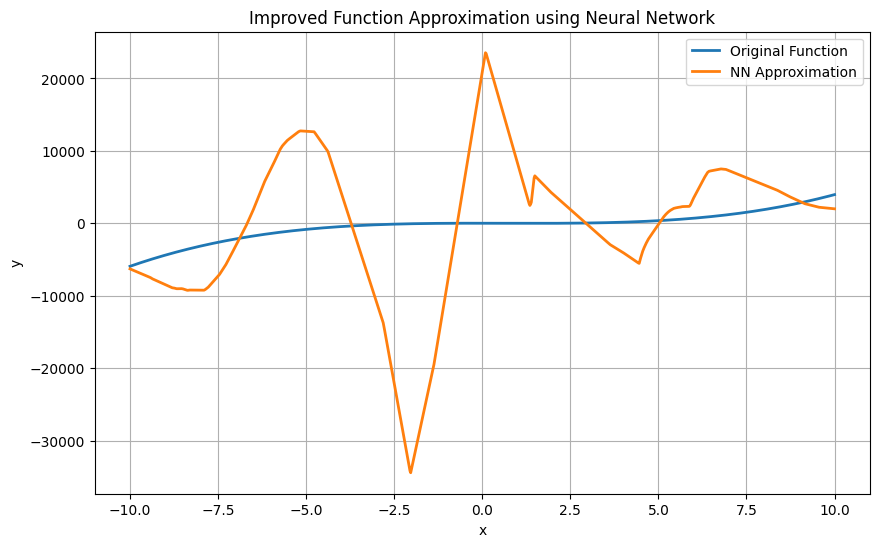

In [67]:
x_plot = np.linspace(-10, 10, 1000)
y_plot_original = polynomial_function(x_plot)
y_plot_approximated = model(torch.from_numpy(x_plot.reshape(-1, 1)).float()).detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot_original, label='Original Function', linewidth=2)
plt.plot(x_plot, y_plot_approximated, label='NN Approximation', linewidth=2)
# plt.scatter(x_test.item(), y_test_pred, color='blue', marker='x', label='Test Point (x=78.6)')
plt.legend()
plt.title('Improved Function Approximation using Neural Network')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
